In [3]:
#KNN

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [2]:
x,y = make_blobs(n_samples=1000, n_features=2, center_box=(-2,2), centers=2)


In [3]:
q_point = np.array([-2.0,0.0])

In [4]:
print(x.shape, y.shape)

(1000, 2) (1000,)


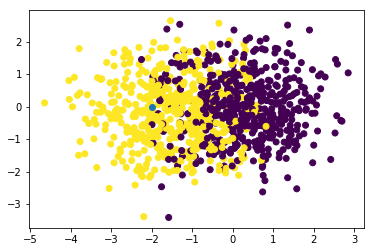

In [5]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.scatter(q_point[0], q_point[1])
plt.show()

In [6]:
def distance(a,b):
    return np.sqrt((np.sum((a-b)**2)))

In [7]:
#Function for KNN

def KNN(x,y,q_pnt,k=5):
    
    m = x.shape[0]
    
    dis_l = []
    
    for ix in range(m):
        dis = distance(x[ix], q_pnt)
        dis_l.append((dis, y[ix]))

    dis_l = sorted(dis_l)
    dis_l = np.array(dis_l)[:k]
    
    uniq = np.unique(dis_l[:,1], return_counts=True)
    out = np.argmax(uniq[1])   

    return uniq[0][out]

In [8]:
KNN(x,y,q_point)

1.0

In [13]:
def accuracy(x_train, y_train,x_val,y_val, k=5):
    y_pred = []
    for ix in x_val:
        pred = KNN(x_train,y_train,ix,k)
        y_pred.append(pred)
        
    score = np.sum(y_val=y_pred)/y_val.shape[0]
    return score